# Population, Agricultural Production, and the Green Revolution

In [24]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

## Population Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [31]:
# Load in population data and specify SA data set
variable_labels = {"SP.POP.TOTL":"Total Population", 
                   "SP.POP.TOTL.FE.IN":"Total Female",
                  "SP.POP.TOTL.MA.IN":"Total Male",
                  "SP.RUR.TOTL":"Total Rural",
                  "SP.URB.TOTL":"Total Urban"}
countries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }

SA_pop = wbdata.get_dataframe(variable_labels, country = countries, parse_dates=True).squeeze()
SA_pop = SA_pop.rename(columns={'date': 'Date'})
SA_pop
# Attributes of interest: Total Population, Total Female Population, Total Male Population, Total Rural Population
# and Total Urban Population

Total Population  Total Female  \
country                 date                                         
Bangladesh              2023-01-01       171466990.0    87109279.0   
                        2022-01-01       169384897.0    85985502.0   
                        2021-01-01       167658854.0    85086513.0   
                        2020-01-01       166298024.0    84419144.0   
                        2019-01-01       164913055.0    83750865.0   
...                                              ...           ...   
South Asia (IDA & IBRD) 1964-01-01       619975727.0   298662280.0   
                        1963-01-01       605163476.0   291525739.0   
                        1962-01-01       590723078.0   284579436.0   
                        1961-01-01       576552257.0   277785897.0   
                        1960-01-01       562663671.0   271147035.0   

                                     Total Male  Total Rural  Total Urban  
country                 date                                               
Bangladesh              2023-01-01   84357711.0  102069155.0   69397835.0  
                        2022-01-01   83399395.0  102120461.0   67264436.0  
                        2021-01-01   82572341.0  102362437.0   65296417.0  
                        2020-01-01   81878880.0  102810427.0   63487597.0  
                        2019-01-01   81162190.0  103227327.0   61685728.0  
...                                         ...          ...          ...  
South Asia (IDA & IBRD) 1964-01-01  321313447.0  512398611.0  107577116.0  
                        1963-01-01  313637737.0  501329809.0  103833667.0  
                        1962-01-01  306143642.0  490498017.0  100225061.0  
                        1961-01-01  298766360.0  479825865.0   96726392.0  
                        1960-01-01  291516636.0  469034728.0   93628943.0  

[512 rows x 5 columns]

In [ ]:
# Produce total population over time plot (include each country and the region)
SA_total = SA_pop["Total Population"]

SA_total.plot(title="Total Population Over Time (South Asia)")

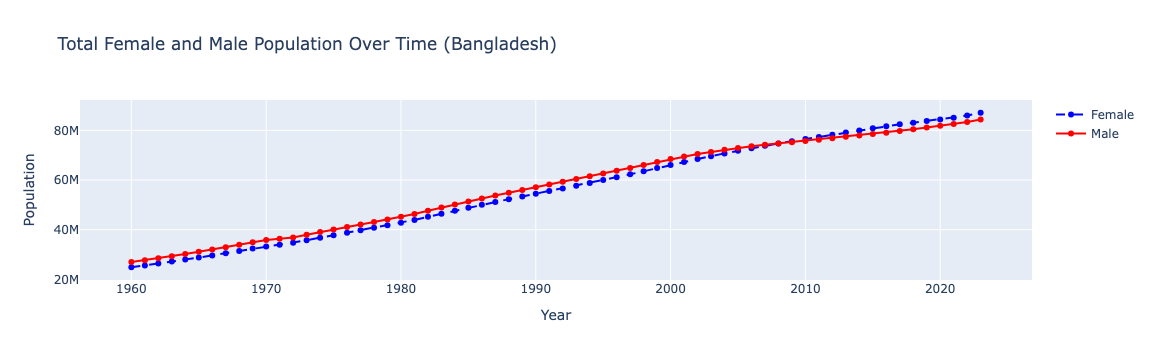

In [9]:
# Produce total female versus male populations over time for each country 
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

overlay_population("Bangladesh", SA_pop)

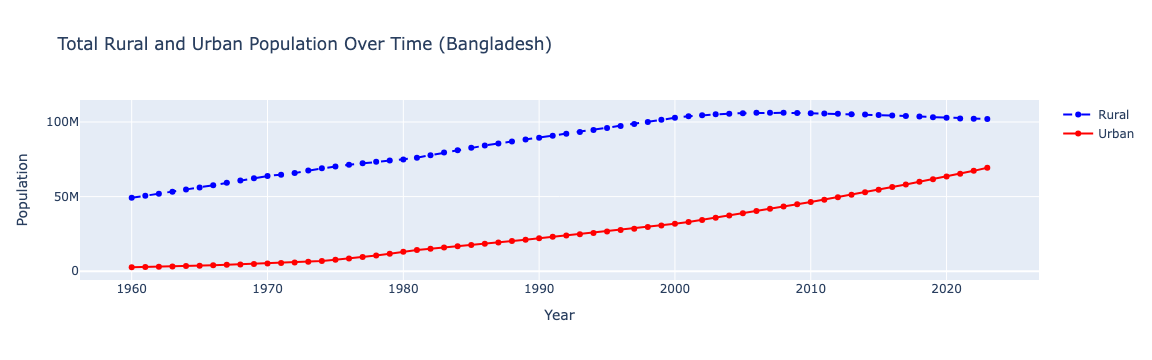

In [10]:
# Produce total rural versus urban populations over time for each country 
# Produce total rural versus urban populations over time for region as a whole

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    rural = df[('Total Rural', country_name)]
    urban = df[('Total Urban', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Rural and Urban Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

overlay_population("Bangladesh", SA_pop)

In [35]:
import plotly.offline as py
import plotly.graph_objs as go
import wbdata
import pandas as pd

# Initialize Plotly for offline plotting
py.init_notebook_mode(connected=True)
countries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }
def population_pyramid(countries, year, selected_country, selected_year):
    """
    Generates a population pyramid for the given country and year.
    
    Args:
    countries (dict): Dictionary of countries and their corresponding codes.
    year (str): The year for the population pyramid.
    selected_country (str): The country code (e.g., 'BGD', 'IND').
    selected_year (str): The year for the population pyramid.
    """
    # Define the age ranges
    age_ranges = []
    for i in range(0, 80, 5):
        age_ranges.append(f"{i:02d}-{i+4:02d}")
    age_ranges.append("80UP")

    # Create dictionaries for male and female population variables
    male_variables = {f"SP.POP.{age_range}.MA": f"Males {age_range}" for age_range in age_ranges}
    female_variables = {f"SP.POP.{age_range}.FE": f"Females {age_range}" for age_range in age_ranges}
    variables = male_variables
    variables.update(female_variables)

    # Get the population data from World Bank
    pyramid = wbdata.get_dataframe(variables, country=countries, parse_dates=True)

    # Set up the layout for the population pyramid chart
    layout = go.Layout(
        barmode='overlay',
        yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
        xaxis=go.layout.XAxis(title='Number')
    )

    # Extract population data for the selected year
    year_data = pyramid.loc[selected_year, :]

    # Create the population pyramid plot
    bins = [
        go.Bar(
            x=year_data.filter(regex="Male").values,
            y=[int(s.split('-')[0]) for s in age_ranges],
            orientation='h',
            name='Men',
            marker=dict(color='purple'),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-year_data.filter(regex="Female").values,
            y=[int(s.split('-')[0]) for s in age_ranges],
            orientation='h',
            name='Women',
            marker=dict(color='pink'),
            hoverinfo='skip'
        )
    ]

    # Display the plot
    py.iplot(dict(data=bins, layout=layout))

# Example usage:
population_pyramid(countries = countries, '2022-01-01', 'BGD', '2022-01-01')

SyntaxError: positional argument follows keyword argument (2182444599.py, line 76)

In [33]:
# Population Pyramid for SA
countries = {"BGD":"Bangladesh",
             "BTN":"Bhutan",
             "IND": "India",
             "MDV": "Maldives",
             "NPL": "Nepal",
             "PAK": "Pakistan",
             "LKA": "Sri Lanka",
             "TSA":"South Asia (IDA & IBRD)"
            }
age_ranges = []
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
variables = male_variables
variables.update(female_variables)

SApyramid = wbdata.get_dataframe(variables,country=countries,parse_dates=True)

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = '2022-01-01'

bins = [go.Bar(x = SApyramid.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='purple'),
               hoverinfo='skip'
               ),

        go.Bar(x = -SApyramid.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

KeyError: '2022-01-01'